### Install Packages and Import Dataset


In this notebook, we’ll be working with a dataset from Inside Airbnb. Airbnb is an online marketplace for arranging vacation rentals and places to stay. The dataset contains listings for Vancouver, Canada, in September 2020. Our data includes an ID number, neighborhood, type of room, the number of people the rental accommodates, number of bathrooms, bedrooms, beds, and the price per night.

Each row in the dataset represents a listing, with various property details:

- **ID number:** A unique identifier for each listing.
- **neighbourhood:** The neighborhood or area where the property is located.
- **room_type:** The type of room available for rent (e.g., Entire home/apt, Private room, Shared room).
- **accommodates:** The number of people the property can accommodate.
- **bathrooms:** The number of bathrooms available in the property.
- **bedrooms:** The number of bedrooms in the property.
- **beds:** The number of beds available in the property.
- **price:** The price per night to rent the property.


This dataset was obtained from [insideairbnb](https://insideairbnb.com/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Our questions are often "**inferential**":  

Obviously, unless you're Airbnb, you can't access every single Airbnb listing to answer certain questions. In data analysis, we often face this challenge — we don't have information about every single person or item in a population. So, we look at a smaller group (a *sample*) and try to make educated guesses about what might be true for the larger group. 

Questions about how patterns or trends in a sample might apply to the wider population are called *inferential questions*. In this notebook, we'll learn how to make these educated guesses using two methods: **point estimation** (where we guess one value for something in the population) and **interval estimation** (where we guess a range of values).

### Sampling distributions

Let's say  a traveler visiting Vancouver, Canada may wish to estimate the population mean (or average) price per night of Airbnb listings.

Let's assume we have all of Airbnb listings because the CEO of airbnb is our friend, and he decides to give it to us (what a good friend eh? 😂). He gives us this `listings.csv` file that has EVERYTHING, that is the assumption.

In [2]:
# Load the Airbnb listings dataset from a CSV file
airbnb = pd.read_csv("dataset/listings.csv")
airbnb

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price
0,1.318800e+04,Riley Park,Entire home/apt,4,1.0,0.0,2.0,14
1,1.335800e+04,Downtown,Entire home/apt,2,1.0,1.0,1.0,20
2,1.349000e+04,Kensington-Cedar Cottage,Entire home/apt,2,1.0,1.0,1.0,35
3,1.426700e+04,Kensington-Cedar Cottage,Entire home/apt,4,1.0,1.0,2.0,35
4,1.625400e+04,Hastings-Sunrise,Entire home/apt,4,1.0,2.0,3.0,36
...,...,...,...,...,...,...,...,...
4981,9.970000e+17,Downtown,Entire home/apt,4,1.0,1.0,2.0,3000
4982,9.970000e+17,South Cambie,Entire home/apt,4,NaN,2.0,NaN,5714
4983,9.970000e+17,South Cambie,Private room,2,1.0,1.0,0.0,8495
4984,9.970000e+17,Downtown,Entire home/apt,4,NaN,2.0,NaN,9600


In [3]:
# Calculate and return the average price from the "price" column in the Airbnb dataset
airbnb["price"].mean()

249.16526273565984

The price per night of all Airbnb rentals in Vancouver, BC is $249.17, on average. This value is our population parameter since we are calculating it using the population data. In real-world data analysis, this parameter is typically *unknown* because we rarely have data for the entire population.

To approximate this, we can take a small random sample from the data. Let’s try selecting 40 listings randomly (a sample size of 40) and calculate the mean price listings in that sample. We'll use the `sample` method of the DataFrame to do this. The `n` argument specifies the sample size, and we’ll set a random seed using NumPy to ensure reproducibility when working with randomness.

In [3]:
# Set the random seed to 100 for reproducibility
np.random.seed(100)

# Randomly select a sample of 40 rows from the Airbnb dataset and calculate the average price from the "price" column
airbnb.sample(n=40)["price"].mean()

222.875

In this random sample, the mean price listings is 222.88, which is quite close to the true population value of 249.17! However, since we used a random sample of size 40, there are a couple of important points to remember.

1.  This 222.88 value is an estimate—our best guess of the population parameter based on the sample. Since we are estimating a single value, we call it a **point estimate**. 

2. Because the sample was random, if we took another random sample of 40 listings and calculated the mean price again, the result would likely be different. Each random sample gives a different point estimate.

In [5]:
# Since no random seed is set, running this multiple times will result in different mean values.
airbnb.sample(n=40)["price"].mean()

315.25

We get a different value for our estimate with each new random sample, highlighting that our point estimate might not be entirely reliable. This variation from sample to sample is called **sampling variability**. It’s normal for estimates to differ, but one question arises...

*"how much variation should we expect?"*

In other words, how much can we trust a point estimate from a single sample? To answer this, we need to understand the variability of our estimates across different samples, which helps us gauge the reliability of any single point estimate. We can explore this by looking at the **spread** or **range** of estimates over multiple random samples.

#### How much variation should we expect?

To understand how much our sample means might vary, we will simulate many samples—around 20,000—of size 40 from our population of Airbnb listings. For each sample, we will calculate the mean price of listings. This will give us a set of sample means, **which we can now visualize with a histogram:**

![](./images/bell_curve.png)


Looking at the histogram, you can see that the distribution of sample means forms a **bell shape** (🔔). This is a typical pattern when we take many random samples and plot their averages. Most of the sample means are clustered around the center, and as we move further away from the center, the number of samples with those means decreases.

This bell-shaped curve represents the **sampling distribution**, which shows us how much the sample means vary. It helps us understand that while each sample mean might be different, most will be close to the actual average price in the population.

#### how did you do that? how did you make the graph above?

We'll use the `sample` function to take random samples of size 40 repeatedly. We’ll repeat this process 20,000 times to generate 20,000 samples. To track the sample each row comes from, we’ll add a column called `replicate` using the `assign` function. Finally, we'll use `concat` to combine all the 20,000 data frames into one large data frame for analysis.

In [4]:
# Initialize an empty list to store the samples
sample_list = []

# Take 20,000 samples, each with 40 listings, and label them by replicate number
for i in range(20_000):
    sample = airbnb.sample(40)           # Randomly sample 40 listings
    sample = sample.assign(replicate=i)  # Add a column to track the replicate number
    sample_list.append(sample)           # Append the sample to the list

# Combine all samples into one large DataFrame
samples = pd.concat(sample_list)

# Display the combined DataFrame
# samples

In [5]:
samples

,id,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,price,replicate
1289,2.871834e+07,Dunbar Southlands,Entire home/apt,2,NaN,1.0,NaN,129,0
1778,3.763693e+07,West Point Grey,Private room,2,NaN,2.0,NaN,150,0
4005,8.490000e+17,Victoria-Fraserview,Private room,1,1.0,1.0,1.0,321,0
4660,9.450000e+17,Shaughnessy,Private room,2,1.0,1.0,1.0,517,0
61,9.580900e+05,Downtown,Entire home/apt,4,NaN,NaN,NaN,50,0
...,...,...,...,...,...,...,...,...,...
1787,3.774614e+07,Mount Pleasant,Entire home/apt,2,1.0,1.0,0.0,150,19999
4538,9.300000e+17,Victoria-Fraserview,Entire home/apt,6,1.0,2.0,4.0,453,19999
3448,7.270000e+17,Downtown Eastside,Entire home/apt,4,NaN,2.0,NaN,258,19999
3755,7.920000e+17,Downtown,Entire home/apt,4,1.0,1.0,2.0,291,19999


> **Note:**  
>
> This table displays only a small portion of the full dataset, which has **800,000 rows** (20,000 samples of 40 listings each). The replicate numbers may appear to repeat here, but all 20,000 replicates are unique. You can view the entire dataset by using `samples.to_csv(samples.csv)` to export it.

To confirm that we have 20,000 samples, the `replicate` column should display values ranging from 0 to 19,999, representing each sample number.

Next, we’ll compute the mean price for listings in each of the 20,000 samples. We do this by grouping the data by the `replicate` column—this groups the listings by sample—and then using the `mean` function to calculate the mean price for each sample.

After completing these steps, we’ll have a data frame with 20,000 mean values, one for each sample. We can print the entries of this data frame to verify that the means were calculated correctly. 

Finally, when we use `reset_index`, we can use the `name` parameter to assign a specific name, like `mean_price`, to the new column that stores these mean values.

In [8]:
sample_estimates = (samples.groupby("replicate")["price"].mean().reset_index(name="sample_mean"))

# sample_estimates

### Visualize the sample distribution

Now that we have calculated the mean price for each of our 20,000 samples, it’s time to visualize the distribution of these sample means. By plotting a histogram, we can observe how the sample means are spread out. This will help us see whether the sample means cluster around a central value or vary widely. The shape of this distribution, typically resembling a bell curve, will give us insight into the variability and consistency of our sample estimates.

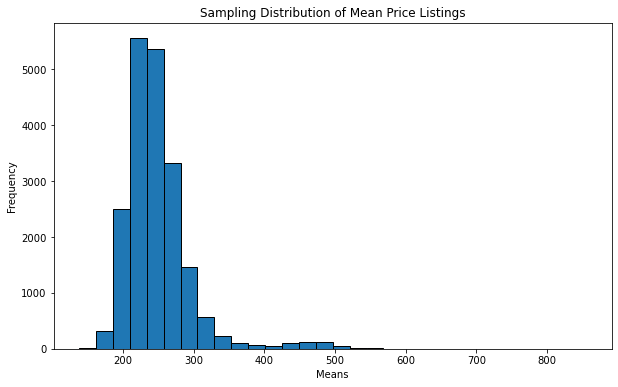

In [7]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_estimates['sample_mean'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Sampling Distribution of Mean Price Listings')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()


The sampling distribution appears to be centered around 250 and most sample mean prices range from about 220 to about 250. In fact, we can calculate the mean of the sample means.

In [9]:
sample_estimates["sample_mean"].mean()

248.71762875000002

We see that the sample means are centered around the population mean of 222.875. This is reassuring because it means that, on average, our sample means are accurate estimates of the population mean—there’s no consistent tendency to overestimate or underestimate it.

However, in a real data analysis situation where you only have **one sample**, this suggests that your estimate could be either above or below the true population mean. To understand the uncertainty around that estimate, we can use **bootstrapping** to simulate many samples and see how much the sample means vary.

### Bootstrapping

We learned that while we can compute a point estimate from a sample and evaluate its accuracy when we have access to the full population, real-world data analysis usually involves just **one sample**. Without access to the entire population, we can't construct the exact sampling distribution, making it difficult to measure how much our sample estimate might vary.

Imagine you have a small bag of 10 marbles and want to know the average size of all marbles in the world. You can calculate the average size from your 10 marbles, but that doesn’t tell you how close your estimate is to the true average of all marbles. This is where **bootstrapping** comes in—it helps us estimate how much our average (or any point estimate) might vary if we could take different samples from the population.

Bootstrapping works by **re-sampling** from the data you already have. By creating many new samples (by randomly selecting data points with replacement), we can build a **distribution** of *possible* estimates. This distribution helps us understand how much our estimate might vary and gives us a range of likely values, which we can use to assess the uncertainty around our sample estimate.

Here's a nice video that further explains bootstrapping with visuals:
[![](./images/bootstrapping_video.png)](https://www.youtube.com/watch?v=Xz0x-8-cgaQ)

### Now, let’s see how this applies to our Airbnb example.

Instead of marbles (or medicine), we’re dealing with real-world data—specifically, Airbnb listings. Just like with the marbles, we only have one sample of listings, and we want to know how accurate our estimate (like the average price) is. By applying the **bootstrap** method to this Airbnb dataset, we can simulate many new samples from our original data and get a better sense of how much the average price might vary.

Let’s now walk through the process of creating a bootstrap distribution step-by-step using the Airbnb dataset to show how this works in code.

### Creating a Bootstrap Distribution

The **bootstrap** method helps us understand how much our sample estimate (like the mean or median) might vary by simulating many new samples from our original data. Here’s how it works, step by step:

1. **Randomly pick one data point** from your original sample.
2. **Write down the value** of that data point.
3. **Put the data point back** into the sample (so it can be picked again).
4. **Keep repeating** this process of picking and recording values until you’ve picked as many data points as were in your original sample. This gives you one new "bootstrap sample."
5. **Calculate your point estimate** (like the mean, median, or another statistic) using the bootstrap sample.
6. **Repeat steps 1–5 many times** (e.g., 10,000 times). This creates many bootstrap samples and gives you a range of estimates, called the "bootstrap distribution."
7. **Look at the range** of these estimates to see what values are reasonable for your population. This range helps us understand the uncertainty around our original estimate.

Before diving into the process of creating a bootstrap distribution, let’s first start by simply taking a sample of 40 observations from our dataset. This will give us a snapshot of the data, just like drawing a random sample from a population. We’ll use this sample to work through the concept step-by-step.

In [11]:
np.random.seed(1234)
one_sample = airbnb.sample(n=40)
# one_sample

In this example, we are taking a simple random sample of 40 rows from the airbnb dataset. This is not yet bootstrapping, but it serves as the foundation for what we’ll be doing next.

Let's visualize it:

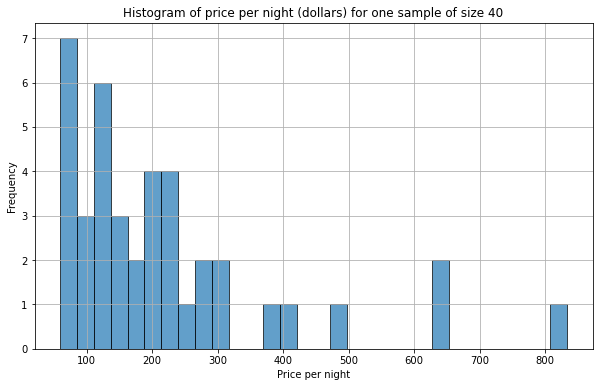

In [12]:
# Histogram of price per night (dollars) for one sample of size 40.
plt.figure(figsize=(10, 6))
plt.hist(one_sample['price'], bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of price per night (dollars) for one sample of size 40')
plt.xlabel('Price per night')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()


In [13]:
one_sample['price'].mean()

219.85

This sample has a mean price per night of $219.85 USD.

Now, to generate a bootstrap of this sample, and calculate a point estimate:

1. Generate a single bootstrap sample: Use the sample function on your DataFrame, setting `frac=1` to sample as many observations as there are rows in the DataFrame. This ensures that the bootstrap sample size matches the original sample size. Set `replace=True` to allow sampling with replacement.
2. Calculate the point estimate: Compute the point estimate (e.g., mean, median, proportion- in our case, we're looking at the mean) from the bootstrap sample.

This process generates a bootstrap sample and calculates the point estimate based on that sample. You would repeat this process many times to build the bootstrap distribution and estimate the range of plausible values for your point estimate.

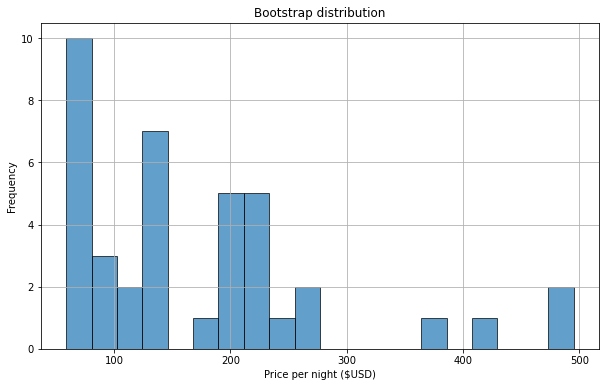

In [13]:
# Create a bootstrap sample from one_sample by sampling 100% of the rows (frac=1) with replacement.
boot1 = one_sample.sample(frac=1, replace=True)
# boot1 is the resulting bootstrap sample, where some rows may appear multiple times, and others may not appear at all.

# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot1['price'], bins=20, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Bootstrap distribution')
plt.xlabel('Price per night ($USD)')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [14]:
boot1["price"].mean()

175.425

We can see that the histogram of the bootstrap sample looks similar to the original sample histogram, but they’re not exactly the same. This is because when we sample with replacement, we don’t get the exact same values as in the original sample.

We’re simulating the process of drawing a new sample from the population by using our original sample. 

Next, we'll generate **20,000 bootstrap samples** from the original sample and calculate the mean for each 🤯. Since we don’t have the full population, using the original sample this way is often the best we can do.

In [18]:
# Initialize an empty list to store the bootstrap samples
bootstrap_samples = []

for i in range(20_000):#underscore is for readability
    sample = one_sample.sample(frac=1, replace=True)  # Sample with replacement
    sample = sample.assign(replicate=i)  # Add replicate number
    bootstrap_samples.append(sample)  # Store the sample

# Combine all bootstrap samples into one DataFrame
boot20000 = pd.concat(bootstrap_samples)

# Display the combined DataFrame
# boot20000

In [23]:
# Calculate the mean price for each bootstrap sample (replicate)
boot_means = boot20000.groupby('replicate')['price'].mean().reset_index(name='mean_price')
# boot_means
boot_means

,replicate,mean_price
0,0,221.500
1,1,217.450
2,2,232.525
3,3,239.075
4,4,255.750
...,...,...
19995,19995,237.275
19996,19996,209.400
19997,19997,216.400
19998,19998,195.425


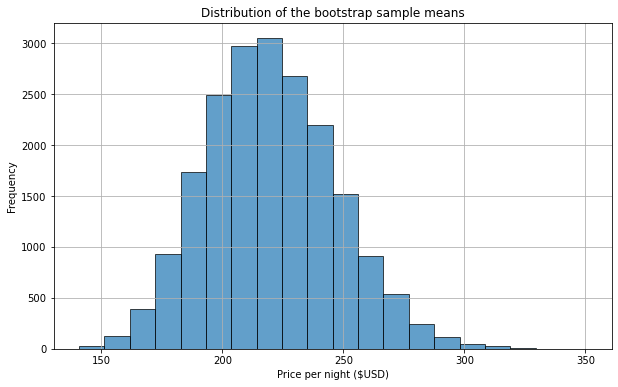

In [21]:
# Plot the histogram of the bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_means['mean_price'], bins=20, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Distribution of the bootstrap sample means')
plt.xlabel('Price per night ($USD)')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

The bootstrap distribution lets us get a sense of the point estimate’s variability.
Because we are resampling from the original sample repeatedly, we see that the bootstrap distribution is centered at the original sample’s mean value, at $219.85.

### Bootstrap to calculate a plausible range

Now that we have our bootstrap distribution, we can create a 95% confidence interval. 

> 🚨 NEW TERMINOLOGY ALERT: 🚨
>
> *Confidence Interval*
>
> A range of values that likely contains the true population parameter (such as the mean) based on your sample data. For example, a **90%** or **85%** confidence interval means that if we took many samples, the true value would fall within that range **90%** or **85%** of the time, respectively.

![](./images/confidence_interval.png)

#### Calculating the 95% Interval

1. Sort the bootstrap sample values.
2. Find the value where 2.5% of the values fall below it (lower bound).
3. Find the value where 97.5% of the values fall below it (upper bound).

The good thing about pandas is that the `quantile()` method handles these steps for us. It automatically sorts the values and finds the desired percentiles (e.g., 2.5% and 97.5%) with a simple function call.

In [24]:
# Calculate the 95% confidence interval bounds (2.5th and 97.5th percentiles) for the mean price
ci_bounds = boot_means["mean_price"].quantile([0.025, 0.975])
ci_bounds

0.025    171.449375
0.975    275.675625
Name: mean_price, dtype: float64

To wrap up our estimation, we'd report:

- **Point Estimate**: The sample mean price-per-night of 40 Airbnb listings is $219.85.
- **95% Confidence Interval**: We estimate that the true mean price-per-night for all Airbnb listings in Vancouver is between 171.44 and 275.68.

Our interval includes the true population mean (249.16), but in real-world scenarios, we wouldn’t know the true population mean because we only have one sample.

### Conclusion

In this notebook, we introduced the basics of statistical inference, laying the groundwork for more advanced techniques like testing differences between populations and assessing relationships between variables. This foundational knowledge will be crucial as you delve into more complex statistical analyses in the future! Here's a summary of what we covered:

1. **Sampling distribution**: We drew random samples and created a sampling distribution from a finite population.
2. **Bootstrapping:** We created a bootstrap distribution to approximate a sampling distribution.


We hope this notebook has provided a practical understanding of bootstrapping when estimating population parameters. Feel free to experiment further with the dataset or the code to enhance your learning!